# Resnet50이용해보기

In [1]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np

In [3]:
model = ResNet50(weights=None)
model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

- resnet튜닝

In [2]:
_KERAS_BACKEND = None
_KERAS_LAYERS = None
_KERAS_MODELS = None
_KERAS_UTILS = None
def get_submodules_from_kwargs(kwargs):
    import tensorflow.keras.utils
    import tensorflow.keras.backend as backend
    import tensorflow.keras.layers as layers
    import tensorflow.keras.models as models
    backend = backend
    layers = layers
    models = models
    utils = tensorflow.keras.utils
    for key in kwargs.keys():
        if key not in ['backend', 'layers', 'models', 'utils']:
            raise TypeError('Invalid keyword argument: %s', key)
    return backend, layers, models, utils

def decode_predictions(preds, top=5, **kwargs):
    """Decodes the prediction of an ImageNet model.
    # Arguments
        preds: Numpy tensor encoding a batch of predictions.
        top: Integer, how many top-guesses to return.
    # Returns
        A list of lists of top class prediction tuples
        `(class_name, class_description, score)`.
        One list of tuples per sample in batch input.
    # Raises
        ValueError: In case of invalid shape of the `pred` array
            (must be 2D).
    """
    global CLASS_INDEX

    backend, _, _, keras_utils = get_submodules_from_kwargs(kwargs)

    if len(preds.shape) != 2 or preds.shape[1] != 1000:
        raise ValueError('`decode_predictions` expects '
                         'a batch of predictions '
                         '(i.e. a 2D array of shape (samples, 1000)). '
                         'Found array with shape: ' + str(preds.shape))
    if CLASS_INDEX is None:
        fpath = keras_utils.get_file(
            'imagenet_class_index.json',
            CLASS_INDEX_PATH,
            cache_subdir='models',
            file_hash='c2c37ea517e94d9795004a39431a14cb')
        with open(fpath) as f:
            CLASS_INDEX = json.load(f)
    results = []
    for pred in preds:
        top_indices = pred.argsort()[-top:][::-1]
        result = [tuple(CLASS_INDEX[str(i)]) + (pred[i],) for i in top_indices]
        result.sort(key=lambda x: x[2], reverse=True)
        results.append(result)
    return results
def _obtain_input_shape(input_shape,
                        default_size,
                        min_size,
                        data_format,
                        require_flatten,
                        weights=None):
    """Internal utility to compute/validate a model's input shape.
    # Arguments
        input_shape: Either None (will return the default network input shape),
            or a user-provided shape to be validated.
        default_size: Default input width/height for the model.
        min_size: Minimum input width/height accepted by the model.
        data_format: Image data format to use.
        require_flatten: Whether the model is expected to
            be linked to a classifier via a Flatten layer.
        weights: One of `None` (random initialization)
            or 'imagenet' (pre-training on ImageNet).
            If weights='imagenet' input channels must be equal to 3.
    # Returns
        An integer shape tuple (may include None entries).
    # Raises
        ValueError: In case of invalid argument values.
    """
    if weights != 'imagenet' and input_shape and len(input_shape) == 3:
        if data_format == 'channels_first':
            if input_shape[0] not in {1, 3}:
                warnings.warn(
                    'This model usually expects 1 or 3 input channels. '
                    'However, it was passed an input_shape with ' +
                    str(input_shape[0]) + ' input channels.')
            default_shape = (input_shape[0], default_size, default_size)
        else:
            if input_shape[-1] not in {1, 3}:
                warnings.warn(
                    'This model usually expects 1 or 3 input channels. '
                    'However, it was passed an input_shape with ' +
                    str(input_shape[-1]) + ' input channels.')
            default_shape = (default_size, default_size, input_shape[-1])
    else:
        if data_format == 'channels_first':
            default_shape = (3, default_size, default_size)
        else:
            default_shape = (default_size, default_size, 3)
    if weights == 'imagenet' and require_flatten:
        if input_shape is not None:
            if input_shape != default_shape:
                raise ValueError('When setting `include_top=True` '
                                 'and loading `imagenet` weights, '
                                 '`input_shape` should be ' +
                                 str(default_shape) + '.')
        return default_shape
    if input_shape:
        if data_format == 'channels_first':
            if input_shape is not None:
                if len(input_shape) != 3:
                    raise ValueError(
                        '`input_shape` must be a tuple of three integers.')
                if input_shape[0] != 3 and weights == 'imagenet':
                    raise ValueError('The input must have 3 channels; got '
                                     '`input_shape=' + str(input_shape) + '`')
                if ((input_shape[1] is not None and input_shape[1] < min_size) or
                   (input_shape[2] is not None and input_shape[2] < min_size)):
                    raise ValueError('Input size must be at least ' +
                                     str(min_size) + 'x' + str(min_size) +
                                     '; got `input_shape=' +
                                     str(input_shape) + '`')
        else:
            if input_shape is not None:
                if len(input_shape) != 3:
                    raise ValueError(
                        '`input_shape` must be a tuple of three integers.')
                if input_shape[-1] != 3 and weights == 'imagenet':
                    raise ValueError('The input must have 3 channels; got '
                                     '`input_shape=' + str(input_shape) + '`')
                if ((input_shape[0] is not None and input_shape[0] < min_size) or
                   (input_shape[1] is not None and input_shape[1] < min_size)):
                    raise ValueError('Input size must be at least ' +
                                     str(min_size) + 'x' + str(min_size) +
                                     '; got `input_shape=' +
                                     str(input_shape) + '`')
    else:
        if require_flatten:
            input_shape = default_shape
        else:
            if data_format == 'channels_first':
                input_shape = (3, None, None)
            else:
                input_shape = (None, None, 3)
    if require_flatten:
        if None in input_shape:
            raise ValueError('If `include_top` is True, '
                             'you should specify a static `input_shape`. '
                             'Got `input_shape=' + str(input_shape) + '`')
    return input_shape
def preprocess_input(x, **kwargs):
    """Preprocesses a numpy array encoding a batch of images.
    # Arguments
        x: a 4D numpy array consists of RGB values within [0, 255].
        data_format: data format of the image tensor.
    # Returns
        Preprocessed array.
    """
    return imagenet_utils.preprocess_input(x, mode='caffe', **kwargs)

In [3]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function
from tensorflow.keras.optimizers import Adam
import os
import warnings

from . import get_submodules_from_kwargs
#from . import imagenet_utils
from. import decode_predictions
from. import _obtain_input_shape

preprocess_input = preprocess_input

WEIGHTS_PATH = ('https://github.com/fchollet/deep-learning-models/'
                'releases/download/v0.2/'
                'resnet50_weights_tf_dim_ordering_tf_kernels.h5')
WEIGHTS_PATH_NO_TOP = ('https://github.com/fchollet/deep-learning-models/'
                       'releases/download/v0.2/'
                       'resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5')

backend = None
layers = None
models = None
keras_utils = None
def identity_block(input_tensor, kernel_size, filters, stage, block):
   
    filters1, filters2, filters3 = filters
    if backend.image_data_format() == 'channels_last':
        bn_axis = 3
    else:
        bn_axis = 1
    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'

    x = layers.Conv2D(filters1, (1, 1),
                      kernel_initializer='he_normal',
                      name=conv_name_base + '2a')(input_tensor)
    x = layers.BatchNormalization(axis=bn_axis, name=bn_name_base + '2a')(x)
    x = layers.Activation('relu')(x)

    x = layers.Conv2D(filters2, kernel_size,
                      padding='same',
                      kernel_initializer='he_normal',
                      name=conv_name_base + '2b')(x)
    x = layers.BatchNormalization(axis=bn_axis, name=bn_name_base + '2b')(x)
    x = layers.Activation('relu')(x)

    x = layers.Conv2D(filters3, (1, 1),
                      kernel_initializer='he_normal',
                      name=conv_name_base + '2c')(x)
    x = layers.BatchNormalization(axis=bn_axis, name=bn_name_base + '2c')(x)

    x = layers.add([x, input_tensor])
    x = layers.Activation('relu')(x)
    return x




def conv_block(input_tensor,
               kernel_size,
               filters,
               stage,
               block,
               strides=(2, 2)):
  
    filters1, filters2, filters3 = filters
    if backend.image_data_format() == 'channels_last':
        bn_axis = 3
    else:
        bn_axis = 1
    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'

    x = layers.Conv2D(filters1, (1, 1), strides=strides,
                      kernel_initializer='he_normal',
                      name=conv_name_base + '2a')(input_tensor)
    x = layers.BatchNormalization(axis=bn_axis, name=bn_name_base + '2a')(x)
    x = layers.Activation('relu')(x)

    x = layers.Conv2D(filters2, kernel_size, padding='same',
                      kernel_initializer='he_normal',
                      name=conv_name_base + '2b')(x)
    x = layers.BatchNormalization(axis=bn_axis, name=bn_name_base + '2b')(x)
    x = layers.Activation('relu')(x)

    x = layers.Conv2D(filters3, (1, 1),
                      kernel_initializer='he_normal',
                      name=conv_name_base + '2c')(x)
    x = layers.BatchNormalization(axis=bn_axis, name=bn_name_base + '2c')(x)

    shortcut = layers.Conv2D(filters3, (1, 1), strides=strides,
                             kernel_initializer='he_normal',
                             name=conv_name_base + '1')(input_tensor)
    shortcut = layers.BatchNormalization(
        axis=bn_axis, name=bn_name_base + '1')(shortcut)

    x = layers.add([x, shortcut])
    x = layers.Activation('relu')(x)
    return x







def ResNet50(include_top=False,
             weights=None,
             input_tensor=None,
             input_shape=None,
             pooling=None,
             classes=2,
             **kwargs):

    global backend, layers, models, keras_utils
    backend, layers, models, keras_utils = get_submodules_from_kwargs(kwargs)

    if not (weights in {'imagenet', None} or os.path.exists(weights)):
        raise ValueError('The `weights` argument should be either '
                         '`None` (random initialization), `imagenet` '
                         '(pre-training on ImageNet), '
                         'or the path to the weights file to be loaded.')

    if weights == 'imagenet' and include_top and classes != 1000:
        raise ValueError('If using `weights` as `"imagenet"` with `include_top`'
                         ' as true, `classes` should be 1000')

    # Determine proper input shape
    input_shape = _obtain_input_shape(input_shape=(288,432,3),
                                      default_size=(288,432,3),
                                      min_size=32,
                                      data_format=backend.image_data_format(),
                                      require_flatten=include_top,
                                      weights=weights)

    if input_tensor is None:
        img_input = layers.Input(shape=input_shape)
    else:
        if not backend.is_keras_tensor(input_tensor):
            img_input = layers.Input(tensor=input_tensor, shape=input_shape)
        else:
            img_input = input_tensor
    if backend.image_data_format() == 'channels_last':
        bn_axis = 3
    else:
        bn_axis = 1

    x = layers.ZeroPadding2D(padding=(3, 3), name='conv1_pad')(img_input)
    x = layers.Conv2D(64, (7, 7),
                      strides=(2, 2),
                      padding='valid',
                      kernel_initializer='he_normal',
                      name='conv1')(x)
    x = layers.BatchNormalization(axis=bn_axis, name='bn_conv1')(x)
    x = layers.Activation('relu')(x)
    x = layers.ZeroPadding2D(padding=(1, 1), name='pool1_pad')(x)
    x = layers.MaxPooling2D((3, 3), strides=(2, 2))(x)

    x = conv_block(x, 3, [64, 64, 256], stage=2, block='a', strides=(1, 1))
    x = identity_block(x, 3, [64, 64, 256], stage=2, block='b')
    x = identity_block(x, 3, [64, 64, 256], stage=2, block='c')

    x = conv_block(x, 3, [128, 128, 512], stage=3, block='a')
    x = identity_block(x, 3, [128, 128, 512], stage=3, block='b')
    x = identity_block(x, 3, [128, 128, 512], stage=3, block='c')
    x = identity_block(x, 3, [128, 128, 512], stage=3, block='d')

    x = conv_block(x, 3, [256, 256, 1024], stage=4, block='a')
    x = identity_block(x, 3, [256, 256, 1024], stage=4, block='b')
    x = identity_block(x, 3, [256, 256, 1024], stage=4, block='c')
    x = identity_block(x, 3, [256, 256, 1024], stage=4, block='d')
    x = identity_block(x, 3, [256, 256, 1024], stage=4, block='e')
    x = identity_block(x, 3, [256, 256, 1024], stage=4, block='f')

    x = conv_block(x, 3, [512, 512, 2048], stage=5, block='a')
    x = identity_block(x, 3, [512, 512, 2048], stage=5, block='b')
    x = identity_block(x, 3, [512, 512, 2048], stage=5, block='c')
    x = GlobalAveragePooling2D()(x)
    x = Dense(1, activation='sigmoid')(x)
    
    

    if include_top:
        x = layers.GlobalAveragePooling2D(name='avg_pool')(x)
        x = layers.Dense(classes, activation='softmax', name='fc1000')(x)
    else:
        if pooling == 'avg':
            x = layers.GlobalAveragePooling2D()(x)
        elif pooling == 'max':
            x = layers.GlobalMaxPooling2D()(x)
        else:
            warnings.warn('The output shape of `ResNet50(include_top=False)` '
                          'has been changed since Keras 2.2.0.')

    # Ensure that the model takes into account
    # any potential predecessors of `input_tensor`.
    if input_tensor is not None:
        inputs = keras_utils.get_source_inputs(input_tensor)
    else:
        inputs = img_input
    # Create model.
    model = models.Model(inputs, x, name='resnet50')

    # Load weights.
    if weights == 'imagenet':
        if include_top:
            weights_path = keras_utils.get_file(
                'resnet50_weights_tf_dim_ordering_tf_kernels.h5',
                WEIGHTS_PATH,
                cache_subdir='models',
                md5_hash='a7b3fe01876f51b976af0dea6bc144eb')
        else:
            weights_path = keras_utils.get_file(
                'resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5',
                WEIGHTS_PATH_NO_TOP,
                cache_subdir='models',
                md5_hash='a268eb855778b3df3c7506639542a6af')
        model.load_weights(weights_path)
        if backend.backend() == 'theano':
            keras_utils.convert_all_kernels_in_model(model)
    elif weights is not None:
        model.load_weights(weights)

    model.compile(optimizer=Adam(lr=1e-5), loss='binary_crossentropy', metrics=['accuracy'])
    return model



In [4]:
import tensorflow as tf
from tensorflow.keras.layers import Input, GlobalAveragePooling2D, Dense, Activation
#base_model=ResNet50(input_shape=(288,432,3))
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.optimizers import Adam
# x = GlobalAveragePooling2D()(base_model.output) #풀링레이어추가
# # x=layers.Dense(2048,kernel_initializer='he_normal')(x)
# # x=layers.Dense(1024,kernel_initializer='he_normal')(x)
# # x=layers.Dense(512,kernel_initializer='he_normal')(x)
# pred = Dense(1, activation='sigmoid')(x)#출력class 1개로 출력레이어추가.
# model = Model(inputs=base_model.input, outputs=pred)
# model.compile(optimizer=SGD(lr=1e-2, decay=1e-4), loss='binary_crossentropy', metrics=['accuracy'])
model = ResNet50(input_shape=(288,432,3))
model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 288, 432, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 294, 438, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 144, 216, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 144, 216, 64) 256         conv1[0][0]                      
___________________________________________________________________________________________

C:\Users\ysk00\Anaconda3\envs\cuda\lib\site-packages\ipykernel_launcher.py:194: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.


- 학습

>>  split
==============================================ResNet50==============================================


C:\Users\ysk00\Anaconda3\envs\cuda\lib\site-packages\ipykernel_launcher.py:194: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.


Found 7425 images belonging to 2 classes.
Found 1834 images belonging to 2 classes.
train shape : (7425,)
Epoch 1/50
1856/1857 [============================>.] - ETA: 0s - loss: 0.6724 - accuracy: 0.5819
Epoch 00001: val_loss improved from inf to 0.97182, saving model to .\result_voice\split-01-0.9718.hdf5
1857/1857 [==============================] - 882s 475ms/step - loss: 0.6724 - accuracy: 0.5817 - val_loss: 0.9718 - val_accuracy: 0.4875
Epoch 2/50
1856/1857 [============================>.] - ETA: 0s - loss: 0.6417 - accuracy: 0.6335
Epoch 00002: val_loss improved from 0.97182 to 0.78011, saving model to .\result_voice\split-02-0.7801.hdf5
1857/1857 [==============================] - 872s 470ms/step - loss: 0.6418 - accuracy: 0.6334 - val_loss: 0.7801 - val_accuracy: 0.5322
Epoch 3/50
1856/1857 [============================>.] - ETA: 0s - loss: 0.5997 - accuracy: 0.6700
Epoch 00003: val_loss did not improve from 0.78011
1857/1857 [==============================] - 869s 468ms/step - 

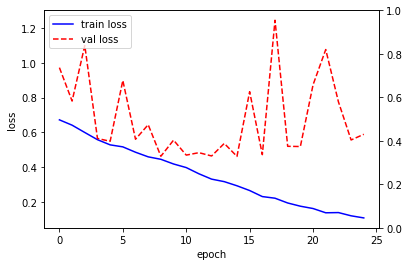

acc: 0.8026	loss: 0.4626
===========================================split finished===========================================


In [5]:
#### import glob
import os
import numpy as np
import cv2
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model
from sklearn.metrics import roc_curve, confusion_matrix
from sklearn.utils import class_weight

%matplotlib inline
SEED = 777

def main():
    #inputSize = 224
    batchSize = 4
    nEpoch = 50
    
    # 디렉토리 정보 설정
    # dataDir = 'D:\\Face_Database\\B-Database'
    dataDir = 'C:\\Users\\ysk00'   
    # 학습 및 테스트 할 데이터베이스 디렉토리명
    trainDB = 'split'  # D:\Face_Database\B-Database\protocol_4\train
    validDB = 'split'
    
    saveDir =  '.\\result_voice'
    if not os.path.exists(saveDir):    
        os.makedirs(saveDir)
    model_path = os.path.join(saveDir, trainDB + '-{epoch:02d}-{val_loss:.4f}.hdf5')
    
    # 데이터베이스별 학습 수행
    print('>> ', trainDB)
    np.random.seed(SEED)

    print('ResNet50'.center(100, '='))
   
    '''
    training
    '''
    K.clear_session()

    # 네트워크 정의
    model = ResNet50(input_shape=(288,432,3))

    # 데이터 generator 생성
    train_datagen = ImageDataGenerator(rescale=1.0/255.0,
                                       horizontal_flip=True,)#이미지augmentation > 이미지를 회전,확대,축소 등 여러변형해보는것.
    train_generator = train_datagen.flow_from_directory(os.path.join(*[dataDir,trainDB,'train']),
                                                        target_size=(288,432),
                                                        batch_size=batchSize,
                                                        class_mode='binary',
                                                        interpolation='bilinear',
                                                        shuffle=True,)

    valid_datagen = ImageDataGenerator(rescale=1.0/255.0)
    valid_generator = valid_datagen.flow_from_directory(os.path.join(*[dataDir, validDB,'val']),
                                                        target_size=(288,432),
                                                        batch_size=batchSize,
                                                        class_mode='binary',
                                                        interpolation='bilinear',
                                                        shuffle=False,)

    print('train shape :',train_generator.classes.shape)
    # unbalanced class를 해결하기 위한 class_weight 설정 #np.unique는 중복원소제거하는거
    class_weights = class_weight.compute_class_weight('balanced', np.unique(train_generator.classes), train_generator.classes) 

    # callback 함수 정의 dropout함수
    early_stop = EarlyStopping(patience=10, monitor='val_loss')
    cb_checkpoint = ModelCheckpoint(filepath=model_path, monitor='val_loss', verbose=1, save_best_only=True)
    step_num=len(train_generator)/batchSize

    # 모델 학습
    hist = model.fit_generator(train_generator, 
                               epochs=nEpoch,
                               steps_per_epoch=len(train_generator),
                               class_weight=class_weights,
                               validation_data=valid_generator,
                               validation_steps=len(valid_generator),
                               verbose=1,
                               callbacks=[early_stop, cb_checkpoint])

    
    # 학습 결과 그래프 그리기
    import matplotlib.pyplot as plt

    fig, loss_ax = plt.subplots()
    acc_ax = loss_ax.twinx()

    loss_ax.plot(hist.history['loss'], 'b', label='train loss')
    loss_ax.plot(hist.history['val_loss'], '--r', label='val loss')
    loss_ax.set_xlabel('epoch')
    loss_ax.set_ylabel('loss')
    loss_ax.legend(loc='upper left')

    plt.show()
    print('acc: {:.4f}\tloss: {:.4f}'.format(hist.history['val_accuracy'][-11], hist.history['val_loss'][-11]))

    print(('{} finished'.format(trainDB)).center(100,'='))

        
if __name__ == '__main__':
    main()

In [6]:
#evaluation
    print("-- Evaluate --")
    scores = model.evaluate_generator(test_generator, steps=5)
    print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100))

-- Evaluate --


NameError: name 'test_generator' is not defined

- test

>> model loaded: split-11-0.4889.hdf5
>>>> evaluating on 'split'
Found 1834 images belonging to 2 classes.
Found 2317 images belonging to 2 classes.
-- Evaluate --
accuracy: 85.00%
                  pred_fake(0)   pred_real(1)
actural_fake(0)             893            215
actual_real(1)             236            973

EER: 0.2203	HTER: 0.1946
>> finished


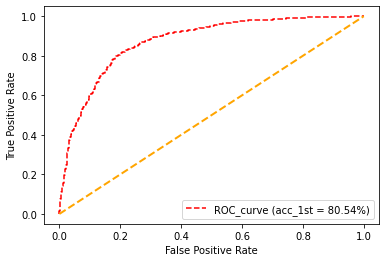

<Figure size 432x288 with 0 Axes>

In [1]:
# 학습된 모델 테스트셋에서 성능 평가
# 얼굴 스푸핑 분야에서 평가 metric으로 HTER이랑 EER 두 개 주로 사용
# =========================================

import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model
from sklearn.metrics import roc_curve, confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.utils import class_weight


%matplotlib inline

def main():
    #inputSize = 224
    batchSize = 4
    
    trainDB = 'split'
    testDB = 'split'
    
    dataDir = 'C:\\Users\\ysk00'
    modelPath = 'C:\\Users\\ysk00\\result_voice\\split-11-0.4889.hdf5'
    
    print('>> model loaded: {}'.format(os.path.basename(modelPath)))
    K.clear_session()
    model = load_model(modelPath)
        
    print(">>>> evaluating on '{}'".format(testDB))
    test_datagen = ImageDataGenerator()

    val_datagen = ImageDataGenerator()
    
    val_datagen = ImageDataGenerator(rescale=1.0/255.0)
    val_generator = val_datagen.flow_from_directory(os.path.join(*[dataDir, testDB, 'val']),
                                                      target_size=(288,432),
                                                      batch_size=batchSize,
                                                      class_mode='binary',
                                                      interpolation='bilinear',
                                                      shuffle=False,)
    
    test_datagen = ImageDataGenerator(rescale=1.0/255.0)
    test_generator = test_datagen.flow_from_directory(os.path.join(*[dataDir, testDB, 'test']),
                                                      target_size=(288,432),
                                                      batch_size=batchSize,
                                                      class_mode='binary',
                                                      interpolation='bilinear',
                                                      shuffle=False,)

    ''' evaluating EER '''
    y_true = val_generator.classes
    y_score = model.predict_generator(val_generator, steps=len(val_generator)).ravel()

    
    fpr, tpr, threshold = roc_curve(y_true, y_score)
    fnr = 1 - tpr
    eer_threshold = threshold[np.nanargmin(np.absolute((fnr-fpr)))]
    val_eer = (fpr[np.nanargmin(np.absolute((fnr - fpr)))] + fnr[np.nanargmin(np.absolute((fnr - fpr)))]) / 2

    ''' evaluating HTER '''
    y_true = test_generator.classes
    y_score = model.predict_generator(test_generator, steps = len(test_generator)).ravel()

    # Calculate EER threshold
    fpr, tpr, threshold = roc_curve(y_true, y_score)
    fnr = 1 - tpr
    eer_threshold = threshold[np.nanargmin(np.absolute((fnr-fpr)))]
    
    #evaluation
    print("-- Evaluate --")
    scores = model.evaluate_generator(test_generator, steps=5)
    print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100))

    # HTER
    y_pred = y_score > eer_threshold
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    labels = test_generator.class_indices
    print('                  pred_fake({})   pred_real({})\nactural_fake({})    {:12d}   {:12d}\nactual_real({})    {:12d}   {:12d}\n'.format(labels['0'], labels['1'], labels['0'], tn, fp, labels['1'], fn, tp))
    hter = (fp/(tn+fp) + fn/(fn+tp)) * 0.5

    # ROC curve
    Accuracy = ((tn+tp) / (tn+fp+fn+tp)) * 100.0

    roc_auc = roc_auc_score(y_true, y_score)

    plt.figure()
    lw = 2

    plt.plot(fpr, tpr, 'r--', label='ROC_curve (acc_1st = %0.2f%%)' % Accuracy)
    plt.plot([0, 1], [0, 1], color = 'orange', lw=lw, linestyle='--')

    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc = "lower right")

    plt.savefig('protocol_4_001.png')
    plt.figure()
    
    print('EER: {:.4f}\tHTER: {:.4f}'.format(val_eer, hter))

    print('>> finished')

        
if __name__ == '__main__':
    main()

# resnet18